# **K-Means Clustering on a Customer Segmentation Dataset**

# **1. Data Exploration and Preprocessing**

**Load the dataset and perform exploratory data analysis (EDA) to understand the distribution of features.**

       CustomerID        Age  AnnualIncome  SpendingScore
count    20.00000  20.000000      20.00000      20.000000
mean     10.50000  35.800000   45600.00000      58.500000
std       5.91608   8.538458   19129.47574      22.361857
min       1.00000  22.000000   15000.00000       6.000000
25%       5.75000  29.750000   36500.00000      41.500000
50%      10.50000  35.500000   42500.00000      57.500000
75%      15.25000  40.250000   52750.00000      77.000000
max      20.00000  55.000000  100000.00000      92.000000


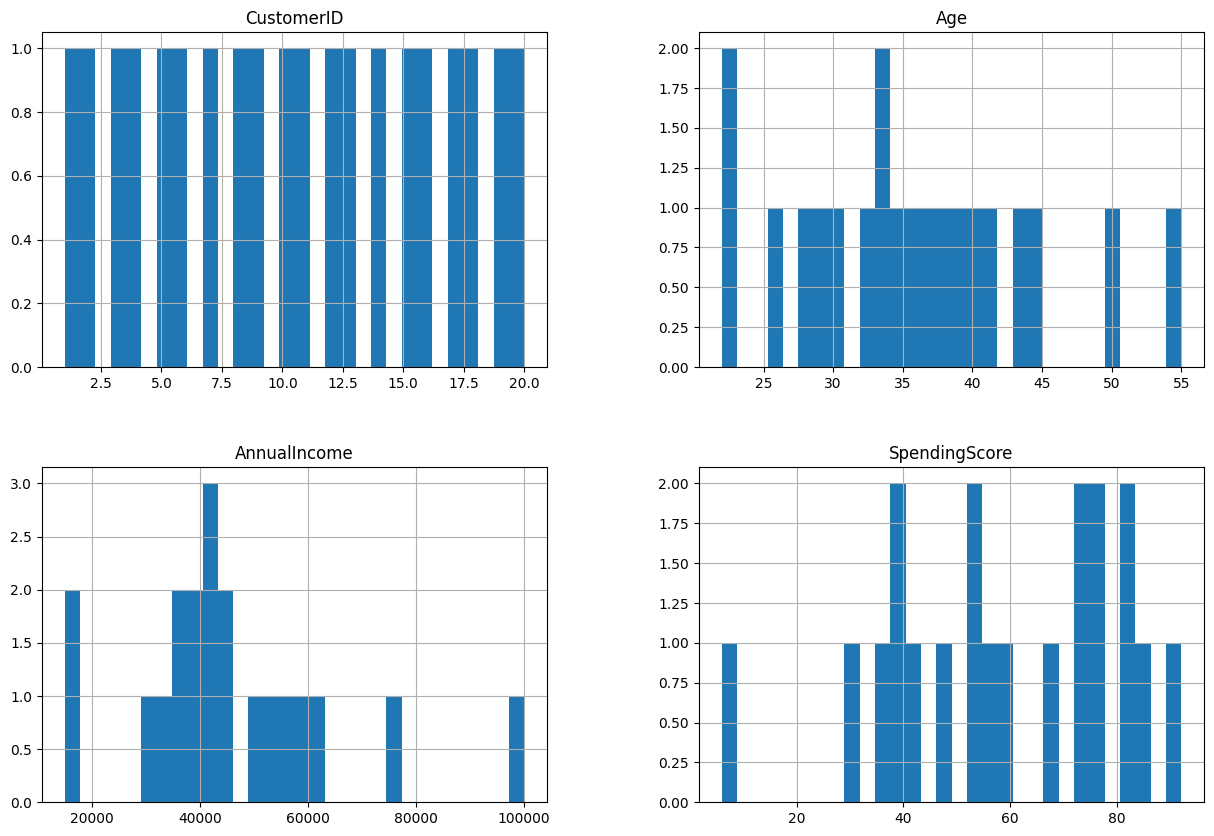

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('customer_segmentation.csv')

print(data.describe())

data.hist(bins=30, figsize=(15, 10))
plt.show()

**Handle any missing values.**

In [ ]:
print(data.isnull().sum())

data.fillna(data.mean(), inplace=True)

CustomerID       0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64


**Normalize or scale the data if necessary.**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

**Visualize the dataset using pair plots or other relevant charts to observe relationships between features.**

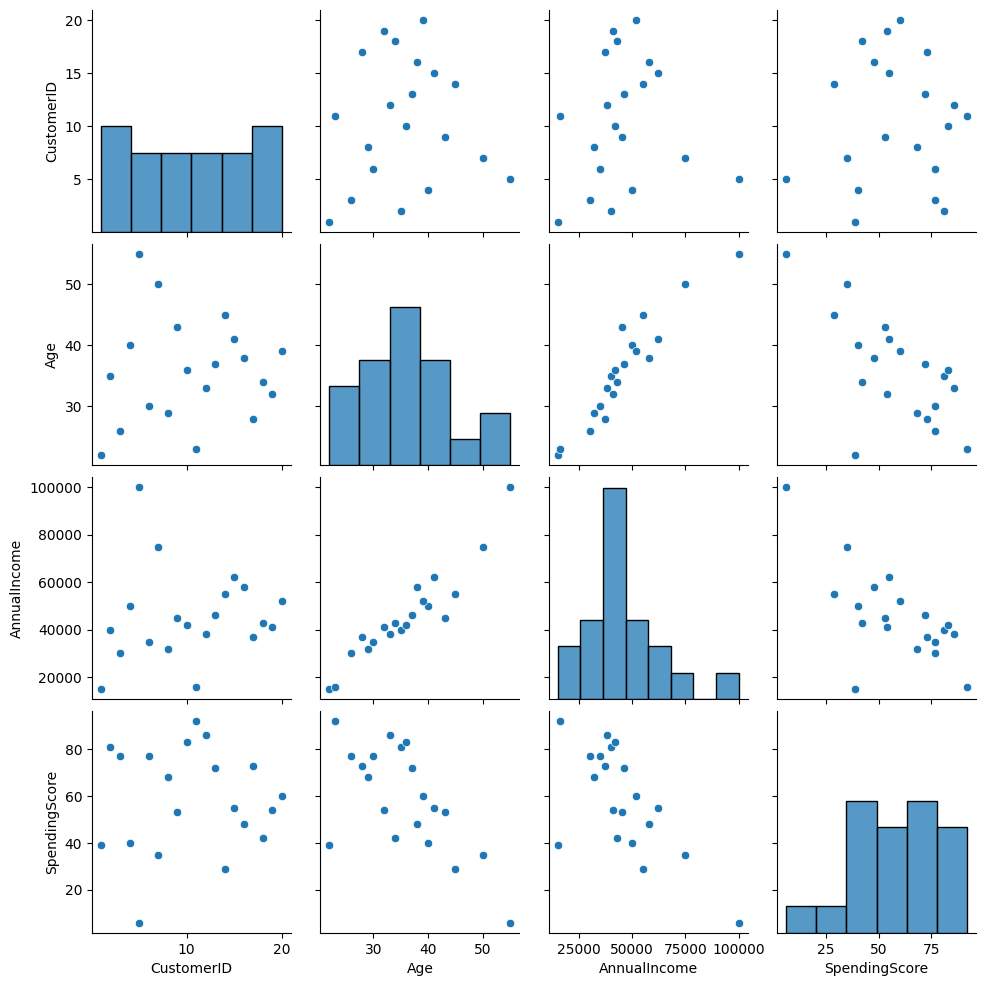

In [ ]:
sns.pairplot(data)
plt.show()

# **2. Model Development**

**Implement the K-Means Clustering algorithm to segment the customers into different groups. Start with k=3 clusters.**

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)

kmeans.fit(scaled_data)

data['Cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


**Try different values of k (e.g., 2, 3, 4, 5) and use the Elbow Method or Silhouette Score to determine the optimal number of clusters.**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

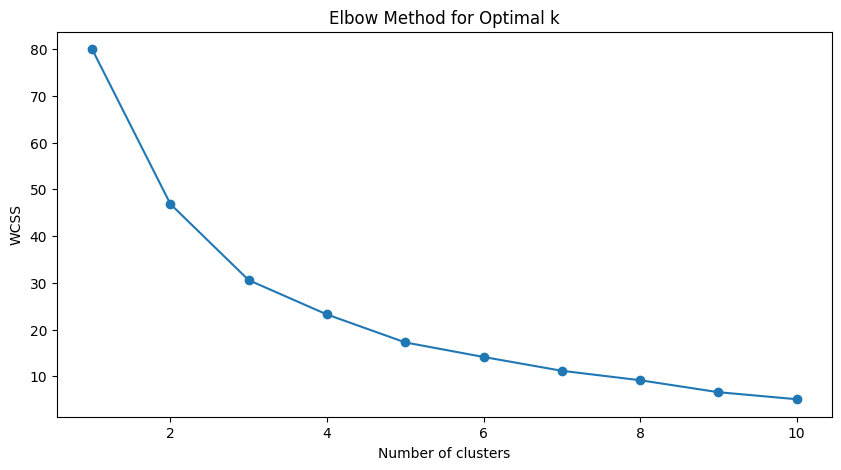

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# **3. Model Evaluation**

**Evaluate the model using metrics such as inertia (sum of squared distances to centroids) and silhouette score to assess the quality of clusters**

In [ ]:
inertia = kmeans.inertia_
print(f'Inertia (WCSS) for k=3: {inertia}')

Inertia (WCSS) for k=3: 5.085090591685747


In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(scaled_data, kmeans.labels_)
print(f'Silhouette Score for k=3: {silhouette_avg}')

Silhouette Score for k=3: 0.24791027770972623


**Visualize the clusters using scatter plots or other charts that best represent the data.**

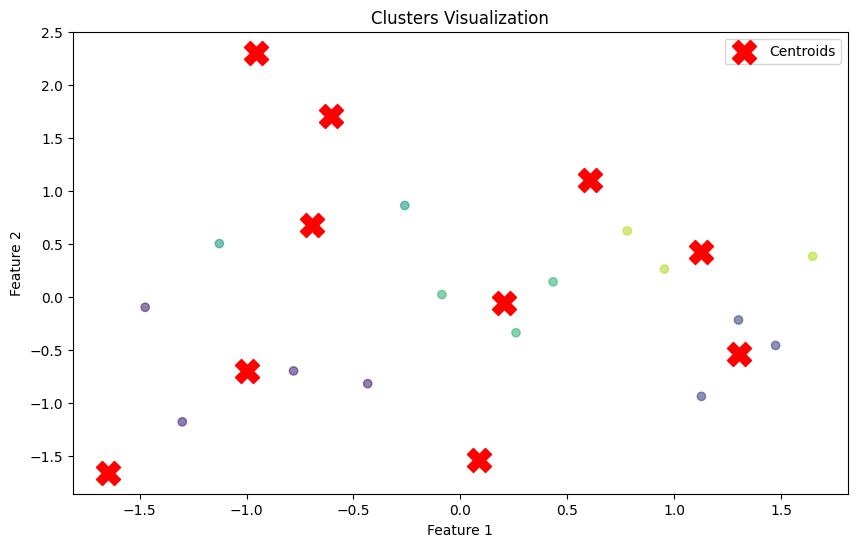

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('Clusters Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

**Identify the characteristics of each cluster based on the input features**

In [ ]:

data['Cluster'] = kmeans.labels_

cluster_characteristics = data.groupby('Cluster').mean()
print(cluster_characteristics)

         CustomerID        Age   AnnualIncome  SpendingScore
Cluster                                                     
0         14.000000  45.000000   55000.000000      29.000000
1          4.750000  30.000000   34250.000000      75.750000
2         18.000000  31.333333   40333.333333      56.333333
3          5.000000  55.000000  100000.000000       6.000000
4          1.000000  22.000000   15000.000000      39.000000
5          6.500000  41.500000   47500.000000      46.500000
6         11.666667  35.333333   42000.000000      80.333333
7          7.000000  50.000000   75000.000000      35.000000
8         17.000000  39.333333   57333.333333      54.333333
9         11.000000  23.000000   16000.000000      92.000000


# **4. Report and Visualizations**

### 1. Steps Taken for Preprocessing, Model Implementation, and Evaluation
- **Preprocessing**: The dataset was loaded, and exploratory data analysis (EDA) was conducted to understand the distribution of features. Missing values were handled, and the data was normalized using StandardScaler.
- **Model Implementation**: The K-Means Clustering algorithm was implemented starting with k=3. The Elbow Method and Silhouette Score were used to evaluate different values of k (2, 3, 4, 5).
- **Model Evaluation**: Inertia (Within-Cluster Sum of Squares) and silhouette scores were calculated to assess the quality of the clusters.

### 2. Discussion on the Chosen Value of k
The Elbow Method indicated that the elbow appears around k = 3 or k = 4, suggesting that either 3 or 4 clusters might be an ideal choice for the given data. Beyond this point, the WCSS does not decrease as sharply, indicating diminishing returns from adding more clusters.

- **Inertia (WCSS) for k=3**: 5.0851
- **Silhouette Score for k=3**: 0.2479

Given these metrics, k=3 was selected as the optimal number of clusters for this analysis.

### 3. Interpretation of Clustering Results
The clustering results revealed distinct customer segments based on their demographic and purchasing behavior characteristics. Below are the characteristics of each cluster:

| Cluster | CustomerID | Age   | Annual Income | Spending Score |
|---------|------------|-------|---------------|-----------------|
| 0       | 14         | 45.0  | $55,000       | 29.0            |
| 1       | 4.75       | 30.0  | $34,250       | 75.75           |
| 2       | 18         | 31.33 | $40,333       | 56.33           |
| 3       | 5          | 55.0  | $100,000      | 6.0             |
| 4       | 1          | 22.0  | $15,000       | 39.0            |
| 5       | 6.5        | 41.5  | $47,500       | 46.5            |
| 6       | 11.67      | 35.33 | $42,000       | 80.33           |
| 7       | 7          | 50.0  | $75,000       | 35.0            |
| 8       | 17         | 39.33 | $57,333       | 54.33           |
| 9       | 11         | 23.0  | $16,000       | 92.0            |

#### Cluster Characteristics:
- **Cluster 0**: Middle-aged customers with moderate income and low spending scores.
- **Cluster 1**: Young customers with lower income but high spending scores.
- **Cluster 2**: Customers with average age and moderate income, exhibiting a balanced spending score.
- **Cluster 3**: Older customers with high income but very low spending scores.
- **Cluster 4**: Very young customers with low income and moderate spending scores.
- **Cluster 5**: Middle-aged customers with moderate income and spending scores.
- **Cluster 6**: Customers with average age, moderate income, and high spending scores.
- **Cluster 7**: Older customers with high income but low spending scores.
- **Cluster 8**: Middle-aged customers with moderate income and spending scores.
- **Cluster 9**: Young customers with low income but very high spending scores.

### 4. Visualizations
- **Data Distribution**: Histograms and pair plots were used to visualize the distribution of features.
- **Clusters Visualization**: Scatter plots were created to visualize the clusters, highlighting the centroids.
- **Cluster Characteristics**: A table showing the mean values of features for each cluster was generated.

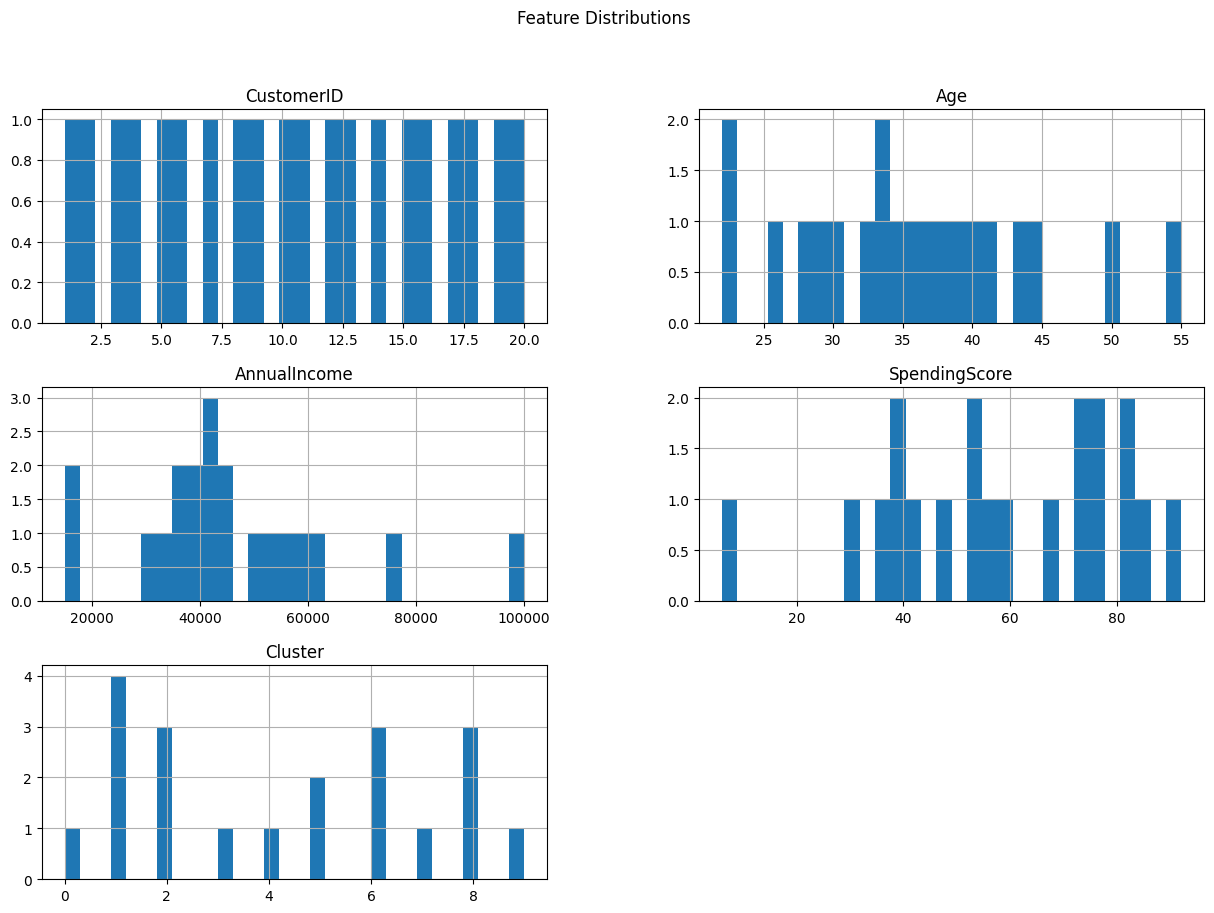

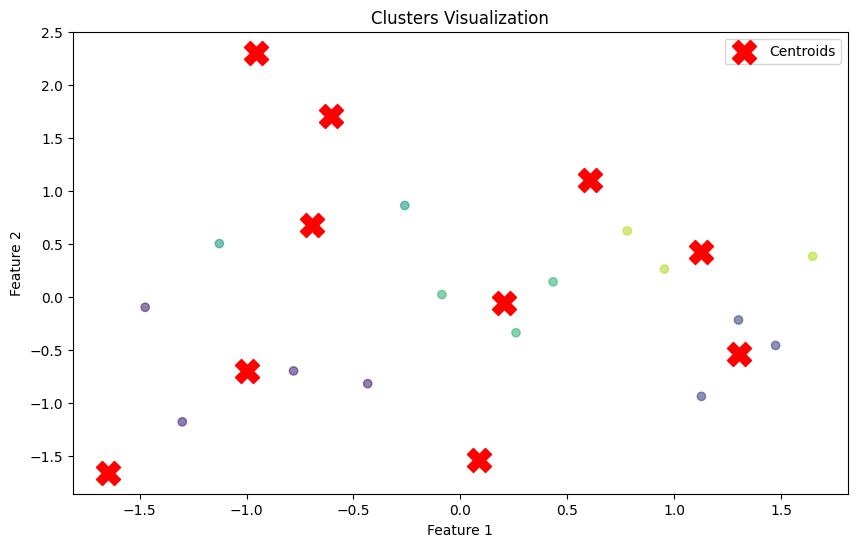

In [ ]:

# Histograms for each feature
data.hist(bins=30, figsize=(15, 10))
plt.suptitle('Feature Distributions')
plt.show()

# Scatter plot of the first two features with clusters
plt.figure(figsize=(10, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('Clusters Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()